# Practical 12 

This practical has two parts (jupyter notebooks), **Part I: Word embeddings** and **Part II: Transformers**.

# Part I: Word embeddings

This Jupyter Notebook consists of the following parts:
1. [Word Embeddings](#word_embeddings)   
    1. [Word2Vec](#word2vec)    
    2. [Word2Vec Architectures](#word2vec_arch)     
    3. [Word Embeddings Visualisation](#visual)
2. [Exploring Word Vectors with GloVe](glove)
    1. [Loading Word Vectors](#loading)
    2. [Finding Closest Vectors](#finding)
    3. [Word Analogies with Vector Arithmetic](#analogies)
3. [Motivation for Part II: Transformers](#transformers)


Check out a supplementary jupyter notebook for Part I, if interested in Skip-Gram implementation.

![vectors](https://humboldt-wi.github.io/blog/img/seminar/topic_models/oprah.png)

---
<a id='word_embeddings'></a>
# Word embeddings

<a id='word2vec'></a>
## Word2Vec

There are two classes of vector models: count-based (TF-IDF, Bag-of-Words) and neural-based. In this practical we will be focusing on neural word embeddings, i.e. word embeddings learned by a neural network.

**Main idea:** to use neural architectures that are predicting (not counting) the next word or a context of a given word.

One of the most known such models is **Word2Vec**. It is based on a neural network that is predicting the probability of a word given it's context. It was created by Mikolov et al. (2013). Here are the main papers on the topic:

* [Efficient Estimation of Word Representations in Vector Space](https://arxiv.org/pdf/1301.3781.pdf)
* [Distributed Representations of Words and Phrases and their Compositionality](https://arxiv.org/abs/1310.4546)

These vectors are ususally reffered to as **_distributed representations of words_** or **_word embeddings_**.

_As word embeddings are a key building block of deep learning models for NLP, word2vec is often assumed to belong to the same group. Technically however, word2vec is not be considered to be part of deep learning, as its architecture is neither deep nor uses non-linearities_ 

*a quote from [Sebastian Ruder's blog](https://ruder.io/word-embeddings-1/)  


<a id='word2vec_arch'></a>
## Word2Vec Architectures

There are two Word2Vec architectures: Skip-Gram and CBOW.

**Skip-Gram** predicts context words given the central word. Skip-Gram with negative sampling is the most popular approach.

**CBOW (Continuous Bag-of-Words)** predicts the central word from the sum of context vectors. This simple sum of word vectors is called "bag of words", which gives the name for the model.

![vectors](https://lena-voita.github.io/resources/lectures/word_emb/w2v/cbow_skip-min.png)


*the image is taken for [Lena Voita's blog](https://lena-voita.github.io/nlp_course/word_embeddings.html#main_content)     
*if interested, please, check it out, it is very informative and illustrative

### How does it work?

Word2vec takes a large text corpus as input and maps each word to a vector, producing word coordinates as output. It first creates a dictionary by training on the input text data, and then calculates a vector representation of the words. The vector representation is learned on contextual proximity: words that occur in the text next to the same words (and therefore, according to the distributive hypothesis, have a similar meaning) will have close coordinates in the vector representation. 

To calculate the proximity of words, usually the cosine or euclidean distances between vectors are used.

Using distributed representations you can build semantic proportions (also known as analogies) and solve examples like:

*king: male = queen: female*
  $\Rightarrow$
*king - man + woman = queen*

![w2v](https://cdn-images-1.medium.com/max/2600/1*sXNXYfAqfLUeiDXPCo130w.png)

<a id='visual'></a>
## Word Embeddings Visualization

Go to https://projector.tensorflow.org/ and visualize Word2Vec embeddings. 

Original Word2Vec repository: https://code.google.com/archive/p/word2vec/

---
<a id='glove'></a>
# Exploring Word Vectors with GloVe:

As we have seen, the word2vec algorithms (such as Skip-Gram) predicts words in a context (e.g. what is the most likely word to appear in "the cat ? the mouse"), while GloVe vectors are based on global counts across the corpus — [see How is GloVe different from word2vec?](https://www.quora.com/How-is-GloVe-different-from-word2vec) on Quora for some better explanations.

The best feature of GloVe is that multiple sets of pre-trained vectors are easily available for [download](https://nlp.stanford.edu/projects/glove/), so that's what we'll use here.

Part II of this notebook is taken from [practical-pytorch tutorials](https://github.com/spro/practical-pytorch/blob/master/glove-word-vectors/glove-word-vectors.ipynb).

<a id='loading'></a>
## Loading Word Vectors
Torchtext includes functions to download GloVe (and other) embeddings

In [1]:
import torch

from dataclasses import dataclass
from typing import List, Dict

### Downloading embeddings

Run the following python cell to automatically download, store and unzip the glove embeddings. Note that approx 1G of storage is required.

Alternatively, you can download the files from [Stanford NLP](https://nlp.stanford.edu/projects/glove/)



In [11]:
# execute only if you want the glove embeddings to be downloaded and unzipped here.

!wget https://nlp.stanford.edu/data/glove.6B.zip 
!unzip glove.6B.zip -d glove.6B

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [2]:
glove_file_path = "glove.6B/glove.6B.50d.txt"

In [3]:
@dataclass(frozen=True)
class GloVe:
    stoi: Dict[str, int]
    itos: List[str]
    vectors: List[torch.Tensor]

def load_glove(path):
    with open(path, "r") as f:
        lines = [l.strip() for l in f]
    
    stoi = {}
    itos = []
    vectors = []
    for line in lines:
        splits = line.split()
        word = splits[0]
        vec = torch.tensor([float(v) for v in splits[1:]])
        
        # We append the word to the idx2word list
        # so its index will be len(idx2word) - 1
        itos.append(word)
        stoi[word] = len(itos) - 1

        vectors.append(vec)

    return GloVe(stoi=stoi, itos=itos, vectors=vectors)


In [4]:
glove = load_glove(glove_file_path)  
print('Loaded {} words'.format(len(glove.itos)))

Loaded 400000 words


Loaded 400000 words
The returned GloVe object includes attributes:

- stoi string-to-index returns a dictionary of words to indexes
- itos index-to-string returns an array of words by index
- vectors returns the actual vectors. To get a word vector get the index to get the vector:

In [5]:
def get_word(word):
    return glove.vectors[glove.stoi[word]]

<a id='finding'></a>
## Finding Closest Vectors

Going from word → vector is easy enough, but to go from vector → word takes more work. Here I'm (naively) calculating the distance for each word in the vocabulary, and sorting based on that distance:

Anyone with a suggestion for optimizing this, please let me know!

In [6]:
from tqdm.notebook import tqdm
import numpy as np 

def manhattan_distance(vector1, vector2):
    return np.abs(vector1 - vector2).sum()

def cosine_similarity(vector1, vector2):
    return np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))

def closest(vec, n=10, dist='pnorm'):
    """
    Find the closest words for a given vector
    """
    if dist=='pnorm':
        all_dists = [(w, torch.dist(vec, get_word(w))) for w in tqdm(glove.itos)]
        return sorted(all_dists, key=lambda t: t[1])[:n]
    elif dist =='manhattan':
        all_dists = [(w, manhattan_distance(vec, get_word(w))) for w in tqdm(glove.itos)]
        return sorted(all_dists, key=lambda t: t[1])[:n]
    elif dist =='cosine':
        all_dists = [(w, cosine_similarity(vec, get_word(w))) for w in tqdm(glove.itos)]
        return sorted(all_dists, key=lambda t: t[1], reverse=True)[:n]
    else:
        print('Unknown distance type')
        return None
    
    

This will return a list of (word, distance) tuple pairs. Here's a helper function to print that list:

In [7]:
def print_tuples(tuples):
    for tuple in tuples:
        print('(%.4f) %s' % (tuple[1], tuple[0]))

Now using a known word vector we can see which other vectors are closest:

In [8]:
print_tuples(closest(get_word('neuron'),dist='manhattan'))

  0%|          | 0/400000 [00:00<?, ?it/s]

(0.0000) neuron
(20.5081) neurons
(21.5858) presynaptic
(21.8358) excitability
(21.8549) post-synaptic
(21.8623) synapse
(22.0291) axons
(22.2381) axon
(22.3861) neuronal
(22.5188) synapses


In [9]:
print_tuples(closest(get_word('queen'),dist='cosine'))

print_tuples(closest(get_word('queen'),dist='manhattan'))

print_tuples(closest(get_word('queen'),dist='pnorm'))

  0%|          | 0/400000 [00:00<?, ?it/s]

(1.0000) queen
(0.8515) princess
(0.8051) lady
(0.7873) elizabeth
(0.7839) king
(0.7822) prince
(0.7693) coronation
(0.7626) consort
(0.7443) royal
(0.7383) crown


  0%|          | 0/400000 [00:00<?, ?it/s]

(0.0000) queen
(17.1559) princess
(18.3461) lady
(18.6469) elizabeth
(18.9747) majesty
(19.0815) coronation
(19.1924) prince
(19.6283) crown
(19.7903) consort
(19.8485) king


  0%|          | 0/400000 [00:00<?, ?it/s]

(0.0000) queen
(3.0129) princess
(3.1624) lady
(3.2966) elizabeth
(3.3926) prince
(3.4368) coronation
(3.4778) king
(3.5708) consort
(3.6211) victoria
(3.6685) crown


<a id='analogies'></a>
## Word Analogies with Vector Arithmetic
The most interesting feature of a well-trained word vector space is that certain semantic relationships (beyond just closeness of words) can be captured with regular vector arithmetic.


In [10]:
# In the form w1 : w2 :: w3 : ?
def analogy(w1, w2, w3, n=10, filter_given=True, dist = 'manhattan'):
    # w2 - w1 + w3 = w4
    result = get_word(w1) - get_word(w2) + get_word(w3)
    closest_words = closest(result, n=n, dist=dist)
    print('\n[%s - %s + %s = ?]' % (w1, w2, w3))
    # Optionally filter out given words
    if filter_given:
        closest_words = [t for t in closest_words if t[0] not in [w1, w2, w3]]
    
    print('Closest word =',closest_words[0][0]) 
    
    vectors = [get_word(w1), get_word(w2), get_word(w3), result, get_word(closest_words[0][0])]
    words = [w1,w2,w3, 'result', closest_words[0][0]]
    return vectors, words
    

In [11]:
vectors, words = analogy('man', 'king', 'queen')


  0%|          | 0/400000 [00:00<?, ?it/s]


[man - king + queen = ?]
Closest word = woman


In [12]:
vectors, words = analogy('king', 'man', 'woman')


  0%|          | 0/400000 [00:00<?, ?it/s]


[king - man + woman = ?]
Closest word = queen


In [13]:

import matplotlib.pyplot as plt


def plot_embedding_vectors(vectors, words, visualise_closest=False):
    fig, ax = plt.subplots()

    # Plot the points
    ax.scatter([v[0] for v in vectors[:3]], [v[1] for v in vectors[:3]], c='blue', label='Words', marker='o')
    ax.scatter(vectors[3][0], vectors[3][1], c='red', label='Result Vector', marker='x')
    if visualise_closest:
        ax.scatter(vectors[4][0], vectors[4][1], c='green', label='Closest Word', marker='s')

    # Draw arrows
    ax.arrow(vectors[1][0], vectors[1][1], vectors[0][0] - vectors[1][0], vectors[0][1] - vectors[1][1],
             head_width=0.02, head_length=0.02, fc='blue', ec='blue')
    ax.arrow(vectors[2][0], vectors[2][1], vectors[3][0] - vectors[2][0], vectors[3][1] - vectors[2][1],
             head_width=0.02, head_length=0.02, fc='blue', ec='blue')

    # Label points
    if visualise_closest:
        labels = [words[0], words[1], words[2], 'Result', words[-1]]
        for i in range(len(vectors)):
            ax.text(vectors[i][0], vectors[i][1], labels[i], fontsize=12, ha='right')

    else:   
        labels = [words[0], words[1], words[2], 'Result']
        for i in range(len(vectors)-1):
            ax.text(vectors[i][0], vectors[i][1], labels[i], fontsize=12, ha='right')

    # Legend
    ax.legend()

    plt.show()
    


  0%|          | 0/400000 [00:00<?, ?it/s]


[king - man + woman = ?]
Closest word = queen


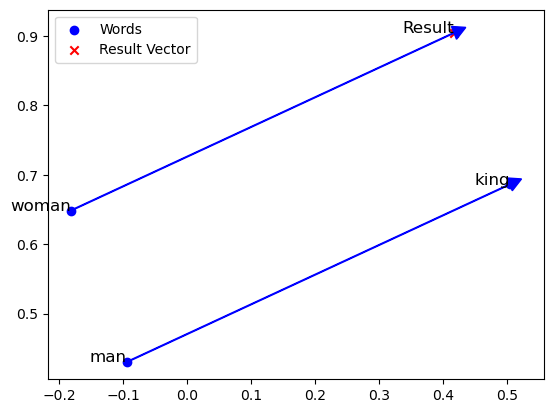

In [14]:
vectors, words = analogy('king', 'man', 'woman')
plot_embedding_vectors(vectors,words)

  0%|          | 0/400000 [00:00<?, ?it/s]


[man - king + queen = ?]
Closest word = woman


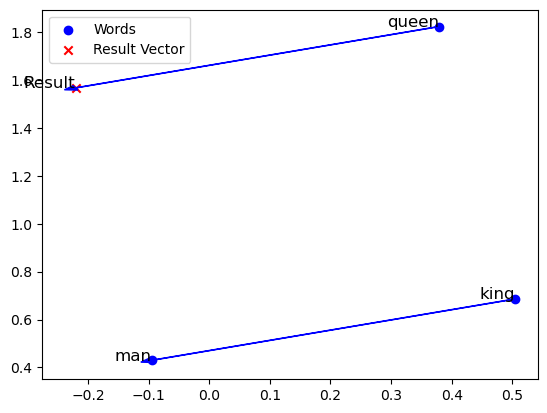

In [15]:
vectors, words = analogy('man', 'king', 'queen')
plot_embedding_vectors(vectors,words)


  0%|          | 0/400000 [00:00<?, ?it/s]


[chinese - china + japan = ?]
Closest word = japanese


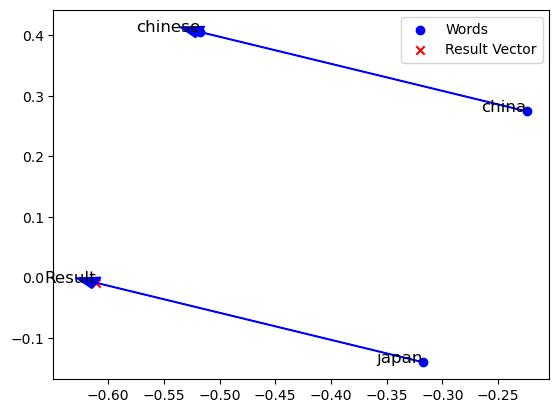

In [16]:
vectors, words = analogy('chinese', 'china', 'japan')
plot_embedding_vectors(vectors, words)

**Comment:** One of the applications of word embeddings is for example using them in the embedding layer of your model instead of using randomly initialised input that is being corrected during training.    

These pre-trained word embeddings (from Word2Vec, Glove, etc.) can either be kept static or modified during training.


# BERT embeddings

Glove embeddings have nice properties but cannot distinguish between multiple meanings of a word. 

E.g. the word *play* can be used as a verb if it refers to the activity of playing (e.g. between kids) or as a noun if it refers to a theatre play.

Instead, contextualised embeddings learn to encode words depending on their context within a sentence (word sequence). We will see for example BERT embeddings which offer contextualized representations leveraging the Transformer architecture.

In [17]:

def plot_embedding_vectors_multi_type(vectors, words):
    fig, ax = plt.subplots()

    # Plot the points
    ax.scatter([v[0] for v in vectors], [v[1] for v in vectors], c='blue', label='Words', marker='o')
    
    # Label points
    for i in range(len(vectors)):
        ax.text(vectors[i][0], vectors[i][1], words[i], fontsize=12, ha='right')

    # Legend
    ax.legend()

    plt.show()
    



Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/opt/homebrew/Caskroom/miniforge/base/envs/dl-2023/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2418: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


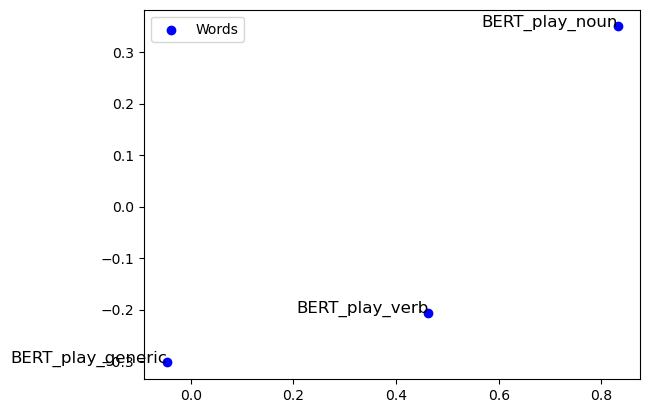

In [18]:
# OPTIONAL: Enable the logger for tracking information
import logging
from transformers import BertTokenizer, BertModel
import matplotlib.pyplot as plt
%matplotlib inline

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# Load the tokenizer for the pre-trained model



def tokenize_parse(sentence,model):
    encoded_dict = tokenizer.encode_plus(
                        sentence,                  
                        add_special_tokens=True,   # Add '[CLS]' and '[SEP]'
                        max_length=64,             # Adjust sentence length
                        pad_to_max_length=True,    # Pad/truncate sentences
                        return_attention_mask=True,# Generate attention masks
                        return_tensors='pt',       # Return PyTorch tensors
                   )
    
   
    input_ids = encoded_dict['input_ids']
    
    # Construct an attention mask (identifying padding/non-padding).
    attention_masks = (encoded_dict['attention_mask'])
    with torch.no_grad():
        outputs = model(input_ids,attention_masks)
        embeddings = outputs.last_hidden_state[0]
    return input_ids, embeddings


model = BertModel.from_pretrained("bert-base-uncased")

custom_text = "Let the dogs out to play with each other"
custom_text2 = "There is a new play in the national theatre "
word_1 = 'play'

input_ids1, output_embeddings1 = tokenize_parse(custom_text,model)

input_ids2, output_embeddings2 = tokenize_parse(custom_text2,model)

input_ids_word1, output_embeddings_word1 = tokenize_parse(word_1,model)

word_id1 = tokenizer.decode(token_ids=input_ids1[0]).split().index('play')
word_id2 = tokenizer.decode(token_ids=input_ids2[0]).split().index('play')
word_id_w1 = tokenizer.decode(token_ids=input_ids_word1[0]).split().index('play')

vectors = [output_embeddings1[word_id1],output_embeddings2[word_id2],output_embeddings_word1[word_id_w1]]
words = ['BERT_play_noun','BERT_play_verb', 'BERT_play_generic']

plot_embedding_vectors_multi_type(vectors,words)

**Note**: Above we demonstrate the vector operations using just the first two dimensions of the embedding vectors. These may not be very representative. We present below more ways of visualising embeddings in 2D space.
 

# Visualisation of embeddings

In all cases visited above we have embedding vectors with high dimensionlity. We will see below how we can use principal component analysis (PCA) to visualise embeddings in 2D space. 

# PCA visualisation


  0%|          | 0/400000 [00:00<?, ?it/s]

queen
princess
lady
elizabeth
prince
coronation
king
consort
victoria
crown


  0%|          | 0/400000 [00:00<?, ?it/s]

king
prince
queen
uncle
ii
grandson
brother
kingdom
son
nephew


  0%|          | 0/400000 [00:00<?, ?it/s]

man
woman
another
boy
one
old
turned
whose
himself
who


  0%|          | 0/400000 [00:00<?, ?it/s]

woman
girl
man
mother
boy
her
she
herself
victim
child


  0%|          | 0/400000 [00:00<?, ?it/s]

mother
daughter
wife
grandmother
husband
sister
father
aunt
woman
friend


  0%|          | 0/400000 [00:00<?, ?it/s]

father
son
brother
grandfather
friend
uncle
cousin
husband
mother
daughter


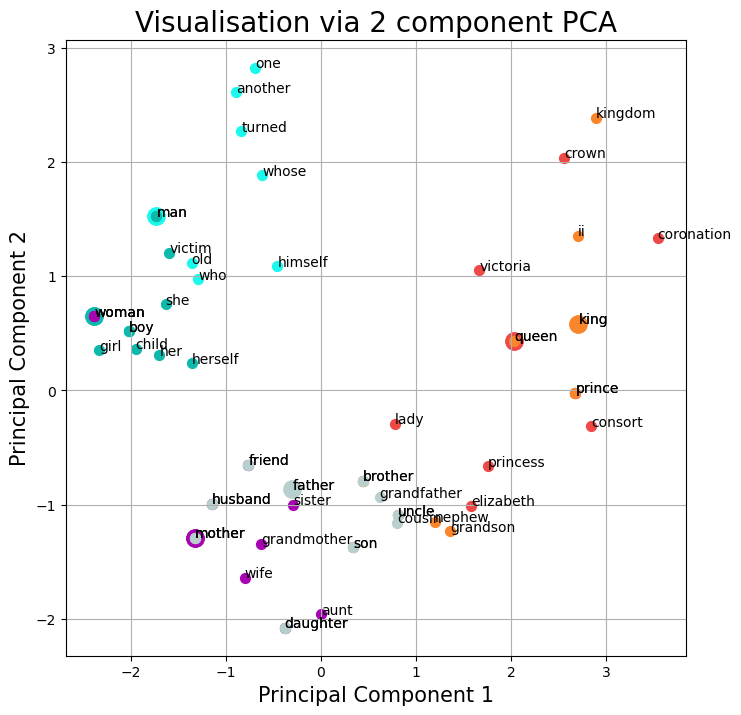

In [19]:

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import random

def display_pca_scatterplot_2D(words=None, topn=5):

    word_vectors = ([get_word(w) for w in words])
    neighborhoods = []
    new_words = []
    for word in words:
        neighborhood = []
        neighbors  = closest(get_word(word),n=topn)
        for n in neighbors:
            n_vector = get_word(n[0])
            n_word = n[0]
            new_words.append(n_word)
            print(n_word)
            neighborhood.append(n_vector.numpy())
        
        neighborhoods.extend(neighborhood)
    
    word_vectors = np.array(neighborhoods)
    words = new_words
    two_dim = PCA(random_state=0).fit_transform(word_vectors)[:,:2]
   
    principalDf = pd.DataFrame(data = two_dim
             , columns = ['principal component 1', 'principal component 2'])
    
    finalDf = principalDf
    finalDf['word']=words

    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('Visualisation via 2 component PCA', fontsize = 20)

    hexadecimal_alphabets = '0123456789ABCDEF'
    color = ["#" + ''.join([random.choice(hexadecimal_alphabets) for j in range(6)]) for i in range(len(words))]
    for i,target in enumerate(words):
        
        indicesToKeep = finalDf['word'] == target
        if i%topn==0:
            si = 150
        else:
            si = 50
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                , finalDf.loc[indicesToKeep, 'principal component 2']
                , c = color[i//topn]
                , s = si)
        
    for i, txt in enumerate(words):
        indicesToKeep = finalDf['word'] == txt
        x = finalDf.loc[indicesToKeep, 'principal component 1'].iloc[0]
        y = finalDf.loc[indicesToKeep, 'principal component 2'].iloc[0]
        ax.annotate(txt, (x, y))
    ax.grid()

words=['queen','king','man','woman', 'mother', 'father']

display_pca_scatterplot_2D(words,10)
